<a href="https://www.kaggle.com/code/adedapoadeniran/pca-mood?scriptVersionId=194344340" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# This is principal component analysis of the factors that might affect my mood.

## 88 days worth of data has been collected, monitoring my mood
### This would be used and compared to time series forecasting to see which is more accurate

Feature Ranking:
1. negativeevents: 0.25282269777045246
2. moving: 0.25185086535823337
3. stress: 0.2493069931727815
4. standing: 0.24533180351457412
5. sleepduration: 0.24491047818040323
6. steps: 0.2393387396078105
7. kcal: 0.2383707457659604
8. sleepquality: 0.23620282639704585
9. temperature: 0.23182257746494617
10. aqi: 0.2261618459266119
11. bpm: 0.2235468809284722
12. positiveevents: 0.2129305969924056
13. screentime: 0.17240075612250164

Top 12 features:
['negativeevents', 'moving', 'stress', 'standing', 'sleepduration', 'steps', 'kcal', 'sleepquality', 'temperature', 'aqi', 'bpm', 'positiveevents']


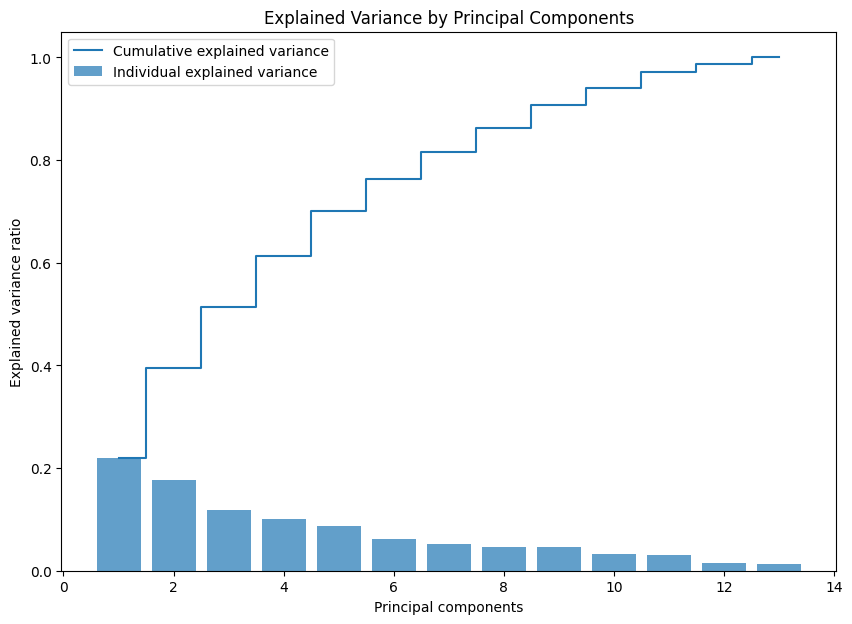

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('/kaggle/input/pcamood/PCAMood.csv')

# Separate the features and target variable
X = df.drop(columns=['mood'])
y = df['mood']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=len(X.columns))  # We initially take as many components as features
X_pca = pca.fit_transform(X_scaled)

# Feature importance ranking based on PCA components
explained_variance = pca.explained_variance_ratio_

# Calculate the contribution of each feature to the principal components
components_importance = np.abs(pca.components_)

# Rank features based on their importance
features_importance = np.sum(components_importance * explained_variance.reshape(-1, 1), axis=0)
features_ranked = sorted(zip(X.columns, features_importance), key=lambda x: x[1], reverse=True)

# Display feature ranking
print("Feature Ranking:")
for i, (feature, importance) in enumerate(features_ranked):
    print(f"{i+1}. {feature}: {importance}")

# Select the top 12 features by eliminating the least important one
top_12_features = [feature for feature, _ in features_ranked[:12]]
print("\nTop 12 features:")
print(top_12_features)

# Visualizing the explained variance
plt.figure(figsize=(10, 7))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center',
        label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()



## What this means is that, if i want to reduce the factors considered for my mood flunctuations, removing screentime will lead to the lowest loss of information, that is, it wont hurt so much to remove it.  This can be explained with the fact that i deliberately avoid social media platforms that affect my mood negatively, for someone else that is always on social media, it might be high up on important factors affecting mood 

### PCA is not a direct feature selection method, but with my method here, i can quickly determine which features to eliminate first during my recursive feature elimination method